In [1]:
### import manually defined automata
%matplotlib inline
from csrl.pomdp import GridPOMDP
from csrl.oaa import oaa
from csrl import ControlSynthesis
import numpy as np 

oa=oaa()

# LTL Specification
#ltl = '(GFa & GFb) & G!c' ### goes to 'a', 'b' recurrently, gallobly ! c

# Translate the LTL formula to an LDBA
print('Number of Omega-automaton states (including the trap state):',oa.shape[1])
display(oa)

print('Initial state:',oa.q0)
print('Transition function: ['),print(*['  '+str(t) for t in oa.delta],sep=',\n'),print(']')
print('Acceptance: ['),print(*['  '+str(t) for t in oa.acc],sep=',\n'),print(']')

Number of Omega-automaton states (including the trap state): 3


Initial state: 0
Transition function: [
  {(): 0, ('a',): 1, ('b',): 0, ('c',): 2, ('a', 'b'): 0, ('a', 'c'): 2, ('b', 'c'): 2, ('a', 'b', 'c'): 2},
  {(): 1, ('a',): 1, ('b',): 0, ('c',): 2, ('a', 'b'): 0, ('a', 'c'): 2, ('b', 'c'): 2, ('a', 'b', 'c'): 2},
  {(): 2, ('a',): 2, ('b',): 2, ('c',): 2, ('a', 'b'): 2, ('a', 'c'): 2, ('b', 'c'): 2, ('a', 'b', 'c'): 2}
]
Acceptance: [
  {(): [None], ('a',): [True], ('b',): [True], ('c',): [None], ('a', 'b'): [None], ('a', 'c'): [None], ('b', 'c'): [None], ('a', 'b', 'c'): [None]},
  {(): [None], ('a',): [True], ('b',): [True], ('c',): [None], ('a', 'b'): [None], ('a', 'c'): [None], ('b', 'c'): [None], ('a', 'b', 'c'): [None]},
  {(): [None], ('a',): [None], ('b',): [None], ('c',): [None], ('a', 'b'): [None], ('a', 'c'): [None], ('b', 'c'): [None], ('a', 'b', 'c'): [None]}
]


(None, None, None)

In [2]:
# POMDP Description
shape = (10,10)
# E: Empty, T: Trap, B: Obstacle
structure = np.array([
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'B',  'B',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'B',  'B',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E']
])

# Labels of the states
label = np.array([
[(),       (),       (),       (),       (),       (),       (),       (),       ('b',),       ('b',)],
[(),       (),       (),       (),       (),       (),       (),       (),       ('b',),       ('b',)],
[(),       (),       ('c',),       ('c',),       (),       (),       (),       (),       (),       ()],
[(),       (),       ('c',),       ('c',),       (),       (),       (),       (),       (),       ()],
[(),       (),       (),       (),       (),       (),       (),       (),       (),       ()],
[(),       (),       (),       (),       (),       (),       (),       (),       (),       ()],
[(),       (),       (),       (),       (),       (),       ('c',),       ('c',),       (),       ()],
[(),       (),       (),       (),       (),       (),       ('c',),       ('c',),       (),       ()],
[('a',),       ('a',),       (),       (),       (),       (),       (),       (),       (),       ()],
[('a',),       ('a',),       (),       (),       (),       (),       (),       (),       (),       ()]
],dtype=np.object)

grid_pomdp = GridPOMDP(shape=shape,structure=structure,label=label) 

# Construct the product POMDP
csrl = ControlSynthesis(grid_pomdp,oa)

C:\Users\JUNCHA~1\AppData\Local\Temp/ipykernel_22728/3991470510.py:29: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ],dtype=np.object)


In [3]:
csrl.belief_state

array([[[[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
         [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
         [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
         [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
         [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
         [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
         [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
         [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
         [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
         [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]],

        [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
    

In [4]:
csrl.A

array([[[[list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3])],
         [list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3])],
         [list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3])],
         [list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3])],
         [list([0, 1, 2, 3]), list([

In [5]:
csrl.reward

array([[[[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [10., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [10., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]],

        [[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0

In [ ]:
exploration_rate, t2, accumulated_rewards = csrl.train_DQN(EPISODES=8000,num_steps=500) #8000, 500

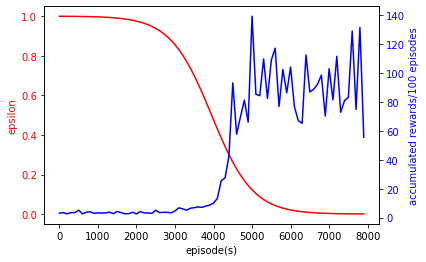

In [7]:
import numpy as np 
import matplotlib.pyplot as plt 

fig, ax1 = plt.subplots() 
        
ax1.set_xlabel('episode(s)') 
ax1.set_ylabel('epsilon', color = 'red') 
ax1.plot(t2, exploration_rate, color = 'red') 
ax1.tick_params(axis ='y', labelcolor = 'red') 
# Adding Twin Axes
ax2 = ax1.twinx() 
ax2.set_ylabel('accumulated rewards/100 episodes', color = 'blue') 
ax2.plot(t2, accumulated_rewards, color = 'blue') 
ax2.tick_params(axis ='y', labelcolor = 'blue') 
# Show plot
plt.show()

In [ ]:
######### verify the dqn_cnn policy
'''
Parameters
----------
start : (r,c) = POMDP state
    The start state of the product POMDPs.

EPISODES : int
    The number of episodes.

num_steps : int 
    The episode length.

'''

from dqn_cnn import DQNAgent
EPISODES=20
num_steps=100

Path = []

gamma=0.99999
gammaB=0.9

# the defined belief_state size and action size
belief_state_size = np.shape(csrl.belief_state)
#action_size = np.shape(csrl.A)

# find the size of belief_state for np.reshape
prod_b_state_size = 1
for i in range(len(belief_state_size)):
    prod_b_state_size = prod_b_state_size * belief_state_size[i]
# find the size of action for np.reshape

# action size
#prod_action_size = csrl.shape[4]
prod_action_size = 4

agent = DQNAgent(prod_b_state_size, csrl.shape[2], csrl.shape[3], csrl.shape[1], prod_action_size, gamma, gammaB)
agent.load("./save/DQN_CNN_10_frontier.h5")
agent.epsilon = 0
done = False
num_episode_for_reward = 100 # print the accumulated reward per num of episode
# initialize the list for plot
accumulated_rewards=[]
exploration_rate=[]
accumulated_rewards_hundred_steps = []

for e in range(EPISODES):
    accumulated_rewards_per_episode=0
    done = False
    subpath = []

    pomdp_state = csrl.pomdp.random_state()
    while csrl.pomdp.label[pomdp_state[0],pomdp_state[1]] == ('c',) or csrl.pomdp.structure[(pomdp_state[0],pomdp_state[1])]=='B':
        #print('state in c and B, state is regenerated')
        pomdp_state = csrl.pomdp.random_state()
    #pomdp_state = (9, 7)

    state = (csrl.shape[0]-1,csrl.oa.q0)+(pomdp_state) # select the start product state
    print('START STATE: '+str(state))
    belief_state = csrl.belief_state # initialize the belief state
    
    csrl.track = [0,1] #self.initial_track # initialize frontier set = [0,1]
    ###print('begin new episode, self.track is reset')
    ###print('frontier reset as: [' + str(self.track)[1:-1] + ']')
    reshaped_reward = csrl.reshaped_reward_init
    ###print('begin new episode, reward is reset to initial reward')

    for step in range(num_steps):
        print(state)
        subpath.append(state)
        # reshape the belief state as the input to acquire the action
        input_b_state = np.reshape(belief_state,(1, csrl.shape[2], csrl.shape[3], csrl.shape[1]))
        print('state: '+str(state))
        #print('input_b_state: '+str(input_b_state))

        # verify the existence of action and select the action from the belief_state
        action_probs = agent.act_trained(input_b_state)
        action_probs = np.reshape(action_probs,(prod_action_size,1))
        #print('action_probs: '+str(action_probs))

        i = 0
        possible_actions = []
        for i in range(len(csrl.A[state])):
            possible_actions.append(action_probs[csrl.A[state][i]])
        action = csrl.A[state][np.argmax(possible_actions)]
        #print('possible_actions :'+str(possible_actions))
        print('action selected: '+str(action))

        ################## The agnet on POMDP simualtion

        # agent moves to the next state
        states, probs = csrl.transition_probs[state][action]
        next_state = states[np.random.choice(len(states),p=probs)]
        # find the observation states' list and the corresponding probabilities
        obsv_states, obsv_probs = csrl.pomdp.get_observation_prob(next_state[-2:])
        # observe the next state
        obsv_state = csrl.pomdp.generate_obsv_state(obsv_states, obsv_probs)

        ################## The belief_state update with the loops

        # temproraily store the current belief state
        current_belief_state = belief_state

        # multiply the transition probability matrix
        belief_state_after_transition = []
        for s in csrl.states():
            belief_state_after_transition.append(belief_state[s]*csrl.belief_transition_probs[s][action])
        belief_state_after_transition = sum(belief_state_after_transition)
        # update the belief state with the observation probability matrix
        updated_belief_state = belief_state_after_transition
        for s in csrl.states():
            updated_belief_state[s] = updated_belief_state[s]*csrl.belief_observation_probs[s][obsv_state[0], obsv_state[1]]
        belief_state = updated_belief_state/sum(sum(sum(sum(updated_belief_state))))

        ################# The training process
        
        # Update the frontier set + update reward setup accordingly
        reshaped_reward = csrl.Tf(state, next_state, reshaped_reward)
        ###print('frontier set: [' + str(csrl.track)[1:-1] + ']')
        
        # calculate the reward from the next belief state and find gamm
        reward = np.sum(np.reshape(belief_state,(1,prod_b_state_size))*reshaped_reward)

        state = next_state

        accumulated_rewards_per_episode = accumulated_rewards_per_episode + reward
        print('reward: '+str(reward))
    
    Path.append(subpath)
    
    print('accumulated_rewards_per_episode: '+str(accumulated_rewards_per_episode))
    accumulated_rewards.append(accumulated_rewards_per_episode)
    exploration_rate.append(agent.epsilon)

    if len(accumulated_rewards)>=num_episode_for_reward:
        accumulated_rewards_hundred_steps.append(np.average(accumulated_rewards))
        accumulated_rewards = []

import matplotlib.pyplot as plt
t1 = np.arange(0, EPISODES, 1)
t2 = np.arange(0, len(accumulated_rewards_hundred_steps)*num_episode_for_reward, num_episode_for_reward)

plt.figure(figsize=(14, 6))
display(plt.plot(t1, exploration_rate))

plt.figure(figsize=(14, 6))
display(plt.plot(t2, accumulated_rewards_hundred_steps))
#matplotlib.pyplot.scatter(len(accumulated_rewards_hundred_steps)*10, accumulated_rewards_hundred_steps, s=0.5)

In [9]:
import pylab as pl
from matplotlib.collections import LineCollection

size_x = 10
size_y = 10

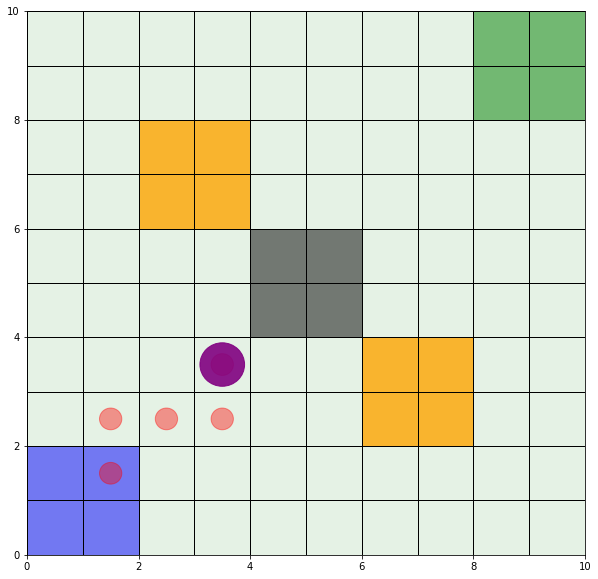

In [10]:
path = Path[0]

### plot the path on 'q0'.

x = np.linspace(0,size_x,size_x+1)
y = np.linspace(0,size_y,size_y+1) 

pl.figure(figsize=(10,10))

hlines = np.column_stack(np.broadcast_arrays(x[0], y, x[-1], y))
vlines = np.column_stack(np.broadcast_arrays(x, y[0], x, y[-1]))
lines = np.concatenate([hlines, vlines]).reshape(-1, 2, 2)
line_collection = LineCollection(lines, color="black", linewidths=1)
ax = pl.gca()
ax.add_collection(line_collection)
ax.set_xlim(int(x[0]), int(x[-1]))
ax.set_ylim(int(y[0]), int(y[-1]))
# backgroud color
ax.add_patch(pl.Rectangle((0, 0), size_x, size_y, fill=True, color='green', alpha=.1))

# plot the Blocks
b_start_x = b_start_y = 4
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='black', alpha=.5))

# plot the Traps, 'c'
b_start_x = 2
b_start_y = 6
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='orange', alpha=.8))

b_start_x = 6
b_start_y = 2
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='orange', alpha=.8))

# plot the 'a's
b_start_x = b_start_y = 0
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='blue', alpha=.5))

# plot the 'b's
b_start_x = b_start_y = 8
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='green', alpha=.5))    
        
for i in range(len(path)):
    if path[i][1]<=0:
        state_idx = path[i]
        ## convert state index in Julia to 'x,y' coordinates in python
        
        coord_x = path[i][3]
        coord_y = size_x-1-path[i][2]
        
        ax.add_patch(pl.Circle((coord_x+0.5, coord_y+0.5), 0.2, fill=True, color='red', alpha=.4))
        if i==0:
            # start point
            ax.add_patch(pl.Circle((coord_x+0.5, coord_y+0.5), 0.4, fill=True, color='purple', alpha=.9))
    else:
        break

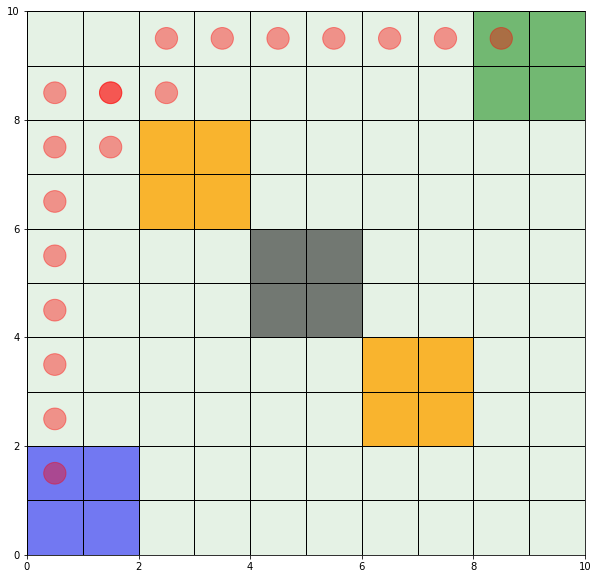

In [11]:
### plot the path on 'q1'.

x = np.linspace(0,size_x,size_x+1)
y = np.linspace(0,size_y,size_y+1) 

pl.figure(figsize=(10,10))

hlines = np.column_stack(np.broadcast_arrays(x[0], y, x[-1], y))
vlines = np.column_stack(np.broadcast_arrays(x, y[0], x, y[-1]))
lines = np.concatenate([hlines, vlines]).reshape(-1, 2, 2)
line_collection = LineCollection(lines, color="black", linewidths=1)
ax = pl.gca()
ax.add_collection(line_collection)
ax.set_xlim(int(x[0]), int(x[-1]))
ax.set_ylim(int(y[0]), int(y[-1]))
# backgroud color
ax.add_patch(pl.Rectangle((0, 0), size_x, size_y, fill=True, color='green', alpha=.1))

# plot the Blocks
b_start_x = b_start_y = 4
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='black', alpha=.5))

# plot the Traps, 'c'
b_start_x = 2
b_start_y = 6
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='orange', alpha=.8))

b_start_x = 6
b_start_y = 2
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='orange', alpha=.8))

# plot the 'a's
b_start_x = b_start_y = 0
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='blue', alpha=.5))

# plot the 'b's
b_start_x = b_start_y = 8
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='green', alpha=.5))    

ii=i
for i in range(ii, len(path)):
    if path[i][1]==1:
        state_idx = path[i]
        ## convert state index in Julia to 'x,y' coordinates in python
        coord_x = path[i][3]
        coord_y = size_x-1-path[i][2]
        
        ax.add_patch(pl.Circle((coord_x+0.5, coord_y+0.5), 0.2, fill=True, color='red', alpha=.4))
        if i==0:
            # start point
            ax.add_patch(pl.Circle((coord_x+0.5, coord_y+0.5), 0.4, fill=True, color='purple', alpha=.9))
    else:
        break

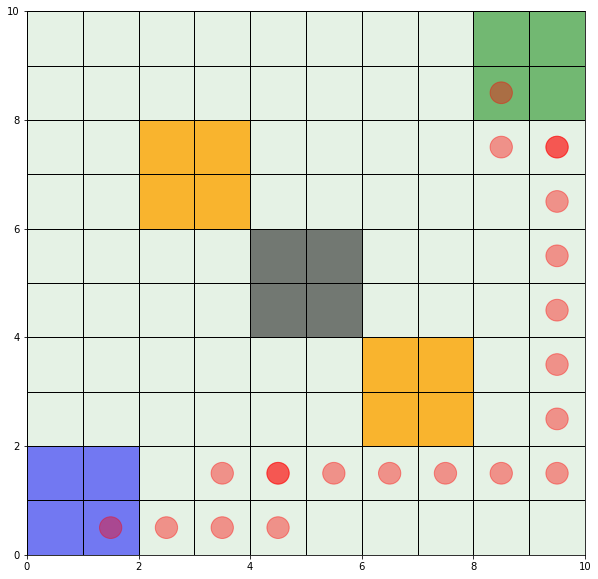

In [12]:
### plot again the path on 'q0'.

x = np.linspace(0,size_x,size_x+1)
y = np.linspace(0,size_y,size_y+1) 

pl.figure(figsize=(10,10))

hlines = np.column_stack(np.broadcast_arrays(x[0], y, x[-1], y))
vlines = np.column_stack(np.broadcast_arrays(x, y[0], x, y[-1]))
lines = np.concatenate([hlines, vlines]).reshape(-1, 2, 2)
line_collection = LineCollection(lines, color="black", linewidths=1)
ax = pl.gca()
ax.add_collection(line_collection)
ax.set_xlim(int(x[0]), int(x[-1]))
ax.set_ylim(int(y[0]), int(y[-1]))
# backgroud color
ax.add_patch(pl.Rectangle((0, 0), size_x, size_y, fill=True, color='green', alpha=.1))

# plot the Blocks
b_start_x = b_start_y = 4
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='black', alpha=.5))

# plot the Traps, 'c'
b_start_x = 2
b_start_y = 6
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='orange', alpha=.8))

b_start_x = 6
b_start_y = 2
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='orange', alpha=.8))

# plot the 'a's
b_start_x = b_start_y = 0
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='blue', alpha=.5))

# plot the 'b's
b_start_x = b_start_y = 8
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='green', alpha=.5))    

ii=i
for i in range(ii, len(path)):
    if path[i][1]<=0:
        state_idx = path[i]
        ## convert state index in Julia to 'x,y' coordinates in python
        coord_x = path[i][3]
        coord_y = size_x-1-path[i][2]
        
        ax.add_patch(pl.Circle((coord_x+0.5, coord_y+0.5), 0.2, fill=True, color='red', alpha=.4))
        if i==0:
            # start point
            ax.add_patch(pl.Circle((coord_x+0.5, coord_y+0.5), 0.4, fill=True, color='purple', alpha=.9))
    else:
        break